In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from tqdm import tqdm

from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


In [2]:
data = pd.read_csv('../data30.csv')
data.head()

,timestamp,00001c2a-8658-4ab2-aa89-0de24d53b5ad,00099b4a-91a3-4a62-83bb-aaa35811d502,001b655e-8ae9-4747-9e2c-d3c02088ad87,00221ca3-92a3-4016-a9cb-b7effc803263,00445a88-c9c5-4081-a88b-a88b00cbaed2,00471731-ac05-45d5-9100-80d16cabc9cc,0050e1df-9c06-4c31-b84a-e4eb290cc87e,005d2eae-292e-4a7e-a8e7-5c2a16b896ab,007c79ee-bd6d-4e8e-80b1-083ef0fd9c06,...,ff0bfbe7-c052-458e-9c7c-bd48120f44c2,ff2ac7d9-cfe1-4552-9b58-498dc0a94f9c,ff32806d-2527-4d2c-a6a6-51d673392999,ff3f1473-edf6-46be-9d5e-8728429280f8,ff5ef7e6-4506-4b89-8550-5ce61239aa2c,ff692b4c-c7aa-4299-acf3-ec2e9116e382,ffa212b4-0854-4fc9-827f-65d43b27ab95,ffa23652-49b4-4992-8b8d-c129b621f894,ffbe4f9b-3e5d-4539-91e5-d091160ea96f,fff239e1-17e1-4822-836c-540a05ccd93d
0,2023-09-15 06:00:00+00:00,0.548240,0.411563,0.358238,0.935073,0.879083,0.189506,0.761592,0.459512,0.714988,...,0.998909,0.583603,0.998286,0.361078,0.748845,0.323716,0.99602,0.492761,0.910048,0.641602
1,2023-09-15 09:00:00+00:00,0.548331,0.411563,0.408981,0.934950,0.879080,0.191663,0.761320,0.459512,0.715066,...,0.998909,0.578968,0.998286,0.364143,0.748827,0.323716,0.99602,0.492441,0.910046,0.641602
2,2023-09-15 12:00:00+00:00,0.547730,0.411563,0.402298,0.934966,0.879079,0.192058,0.760954,0.459512,0.715058,...,0.998909,0.575859,0.998286,0.364152,0.750123,0.323716,0.99602,0.492517,0.910043,0.641602
3,2023-09-15 15:00:00+00:00,0.547683,0.411563,0.400674,0.934928,0.879079,0.192107,0.760577,0.459512,0.715064,...,0.998909,0.570147,0.998286,0.364399,0.750077,0.323716,0.99602,0.494846,0.910040,0.641602
4,2023-09-15 18:00:00+00:00,0.547840,0.411563,0.394738,0.934978,0.879078,0.192084,0.760212,0.459512,0.715062,...,0.998909,0.563402,0.998286,0.364395,0.750069,0.323716,0.99602,0.494488,0.910038,0.641602


In [3]:
new_df = data.melt(id_vars=['timestamp'], var_name='metric', value_name='value')
new_df.head()

,timestamp,metric,value
0,2023-09-15 06:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0.548240
1,2023-09-15 09:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0.548331
2,2023-09-15 12:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0.547730
3,2023-09-15 15:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0.547683
4,2023-09-15 18:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0.547840


In [36]:
new_df.to_pickle('./data/marco.pkl')

In [4]:
data.shape, new_df.shape

((171, 2833), (484272, 3))

In [5]:
new_df.groupby(['timestamp', 'metric'])['value'].mean()

timestamp                  metric                              
2023-09-15 06:00:00+00:00  00001c2a-8658-4ab2-aa89-0de24d53b5ad    0.548240
                           00099b4a-91a3-4a62-83bb-aaa35811d502    0.411563
                           001b655e-8ae9-4747-9e2c-d3c02088ad87    0.358238
                           00221ca3-92a3-4016-a9cb-b7effc803263    0.935073
                           00445a88-c9c5-4081-a88b-a88b00cbaed2    0.879083
                                                                     ...   
2023-10-06 12:00:00+00:00  ff692b4c-c7aa-4299-acf3-ec2e9116e382    0.323716
                           ffa212b4-0854-4fc9-827f-65d43b27ab95    0.996020
                           ffa23652-49b4-4992-8b8d-c129b621f894    0.519431
                           ffbe4f9b-3e5d-4539-91e5-d091160ea96f    0.909682
                           fff239e1-17e1-4822-836c-540a05ccd93d    0.599609
Name: value, Length: 484272, dtype: float64

In [6]:
new_df['label'] = new_df['value'].apply(lambda x: 1 if x < 0.10 else 0)
new_df.head()

,timestamp,metric,value,label
0,2023-09-15 06:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0.548240,0
1,2023-09-15 09:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0.548331,0
2,2023-09-15 12:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0.547730,0
3,2023-09-15 15:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0.547683,0
4,2023-09-15 18:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0.547840,0


In [7]:
new_df = new_df[['timestamp', 'metric', 'label', 'value']]
new_df.columns

Index(['timestamp', 'metric', 'label', 'value'], dtype='object')

In [8]:
new_df.head()

,timestamp,metric,label,value
0,2023-09-15 06:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0,0.548240
1,2023-09-15 09:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0,0.548331
2,2023-09-15 12:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0,0.547730
3,2023-09-15 15:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0,0.547683
4,2023-09-15 18:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0,0.547840


In [9]:
new_df.to_pickle('data/data.pkl')

In [10]:
new_df = pd.read_pickle('data/data.pkl')
new_df

,timestamp,metric,label,value
0,2023-09-15 06:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0,0.548240
1,2023-09-15 09:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0,0.548331
2,2023-09-15 12:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0,0.547730
3,2023-09-15 15:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0,0.547683
4,2023-09-15 18:00:00+00:00,00001c2a-8658-4ab2-aa89-0de24d53b5ad,0,0.547840
...,...,...,...,...
484267,2023-10-06 00:00:00+00:00,fff239e1-17e1-4822-836c-540a05ccd93d,0,0.599609
484268,2023-10-06 03:00:00+00:00,fff239e1-17e1-4822-836c-540a05ccd93d,0,0.599609
484269,2023-10-06 06:00:00+00:00,fff239e1-17e1-4822-836c-540a05ccd93d,0,0.599609
484270,2023-10-06 09:00:00+00:00,fff239e1-17e1-4822-836c-540a05ccd93d,0,0.599609


In [11]:
new_df.label.value_counts()

label
0    477769
1      6503
Name: count, dtype: int64

In [12]:
len(new_df.loc[new_df['label'] == 1]) / len(new_df.loc[new_df['label'] == 0]) * 100

1.3611180298428738

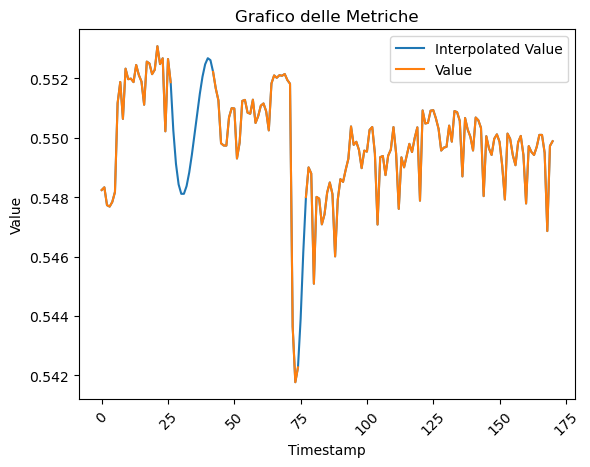

In [13]:
filtered_df_1 = new_df[new_df['metric'] == '00001c2a-8658-4ab2-aa89-0de24d53b5ad']
filtered_df_2 = new_df[new_df['metric'] == '00001c2a-8658-4ab2-aa89-0de24d53b5ad']

plt.plot(np.arange(len(filtered_df_1.value)), filtered_df_2['value'].interpolate(method='cubic'), label='Interpolated Value')
plt.plot(np.arange(len(filtered_df_1.value)), filtered_df_1['value'], label='Value')

# Personalizza le etichette degli assi
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Grafico delle Metriche')

# Ruota le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Aggiungi una legenda
plt.legend()

# Mostra il grafico
plt.show()


In [14]:
df = new_df.copy()

In [75]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

max_timestamp = df['timestamp'].max()
last_24_hours = max_timestamp - timedelta(days=1)
last_week = max_timestamp - timedelta(days=7)

train = df[(df['timestamp'] >= last_week) & (df['timestamp'] < last_24_hours)]
test = df[df['timestamp'] >= last_24_hours]

In [76]:
train.loc[:, 'value'] = train['value'].interpolate(method='cubic')
test.loc[:, 'value'] = test['value'].interpolate(method='cubic')

In [77]:
def label_function(group):
    if (group['value'].shift(-1) < 0.10).any():
        return 1
    else:
        return 0

In [18]:
8*7

56

In [262]:
def extract_features(df, period=4):
    feat_list = []

    df = df.sort_values(['metric', 'timestamp'])
    step = period // 2 
    groups = df.groupby('metric')
    
    for metric, group in groups:
        group['value'] = group['value'].interpolate(method='cubic')
        
        if len(group) >= period:
            for i in range(0, len(group) - period, step):
                window = group.iloc[i : i + period, :]
                next_window = group.iloc[i + step : i + period + step, :]
                
                """
                idx_chg = np.where(
                                            ((next_window['value'] <= 0.10) & (window['value'] > 0.10)) |
                                            ((next_window['value'] > 0.10) & (window['value'] <= 0.10))
                                        )[0]
                """
                if (next_window['value'] <= 0.10).any():
                    mean_value = window['value'].mean()
                    var_value = window['value'].var()
                    label = 1
                else:
                    mean_value = window['value'].mean()
                    var_value = window['value'].var()
                    label = 0

                feat_list.append({'min_timestamp': window['timestamp'].min(), 'max_timestamp': window['timestamp'].max(),
                                     #'v_chg_pos': -1 if idx_chg.size > 0 else idx_chg,
                                  'metric': metric, 'label': label, 'mean': mean_value, 'var': var_value})

    feat = pd.DataFrame(feat_list)
    return feat


In [263]:
feat_tr = extract_features(train, period=4)
feat_ts = extract_features(test, period=4)
feat_tr.shape, feat_ts.shape

((62304, 6), (8496, 6))

((447456, 4), (14160, 4))
((113280, 4), (5664, 4))


In [264]:
feat_tr['label'].value_counts()

label
0    61322
1      982
Name: count, dtype: int64

In [265]:
feat_ts['label'].value_counts()

label
0    8371
1     125
Name: count, dtype: int64

In [266]:
def random_undersampler(X, y, target_percentage=0.5, random_seed=None):

    if target_percentage <= 0 or target_percentage >= 1:
        raise ValueError("La target_percentage deve essere compresa tra 0 e 1")

    class_counts = y.value_counts()
    minority_class = class_counts.idxmin()
    majority_class = class_counts.idxmax()

    minority_count_target = int(class_counts[minority_class] / target_percentage)

    if class_counts[minority_class] >= minority_count_target:
        return X, y

    minority_indices = y[y == minority_class].index

    majority_indices = y[y == majority_class].sample(n=minority_count_target - class_counts[minority_class], random_state=random_seed).index

    selected_indices = minority_indices.append(majority_indices)

    X_resampled = X.loc[selected_indices]
    y_resampled = y.loc[selected_indices]

    X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=random_seed)

    return X_resampled.values, y_resampled.values


In [305]:
mc = 30
acc_scores, prec_scores, rec_scores, f1_scores = np.zeros(mc), np.zeros(mc), np.zeros(mc), np.zeros(mc)
res = {
    'acc' : acc_scores,
    'prec' : prec_scores,
    'rec' : rec_scores,
    'f1' : f1_scores,
    'true_labels' : [],
    'pred_labels' : []
}


tr = feat_tr.drop(['min_timestamp', 'max_timestamp', 'metric', 'label'], axis=1)
y_tr = feat_tr['label']

for trial in tqdm(range(mc)):
    X_resampled, y_resampled = random_undersampler(tr, y_tr, target_percentage=0.5)
    
    ts = feat_ts.drop(['min_timestamp', 'max_timestamp', 'metric', 'label'], axis=1).values
    y_ts = feat_ts['label'].values
    
    clf = RandomForestClassifier()
    #clf = make_pipeline(StandardScaler(), SVC(kernel='poly',degree=3))
    
    clf.fit(X_resampled, y_resampled)
    y_pred = clf.predict(ts)
    
    res['acc'][trial] = accuracy_score(y_ts, y_pred)
    res['prec'][trial] = precision_score(y_ts, y_pred)
    res['rec'][trial] = recall_score(y_ts, y_pred)
    res['f1'][trial] = f1_score(y_ts, y_pred)
    res['true_labels'].extend(y_ts)
    res['pred_labels'].extend(y_pred)
    
    
print(f'ACC: {round(np.mean(res["acc"]), 3)}, +/- {round(np.std(res["acc"]), 3)}')
print(f'PRE: {round(np.mean(res["prec"]), 3)}, +/- {round(np.std(res["prec"]), 3)}')
print(f'REC: {round(np.mean(res["rec"]), 3)}, +/- {round(np.std(res["rec"]), 3)}')
print(f'F1: {round(np.mean(res["f1"]), 3)}, +/- {round(np.std(res["f1"]), 3)}')




100%|██████████| 30/30 [00:08<00:00,  3.71it/s]

ACC: 0.994, +/- 0.002
PRE: 0.71, +/- 0.054
REC: 0.996, +/- 0.004
F1: 0.827, +/- 0.038


In [306]:
confusion_matrix(res['true_labels'], res['pred_labels'], normalize='all')

array([[9.79150973e-01, 6.13622097e-03],
       [5.88512241e-05, 1.46539548e-02]])

In [307]:
tn, fp, fn, tp = confusion_matrix(res['true_labels'], res['pred_labels']).ravel()
(tn, fp, fn, tp)\\

(249566, 1564, 15, 3735)

In [10]:
tn, fp, fn, tp = 249566 + 15, (1564 + 3735 )/2 , 0, (1564 + 3735 )/2
tn, fp, fn, tp

(249581, 2649.5, 0, 2649.5)

In [11]:
def calculate_accuracy(TN, FP, FN, TP):
    accuracy = (TN + TP) / (TN + FP + FN + TP)
    return accuracy


In [12]:
calculate_accuracy(tn, fp, fn, tp)

0.9896049121155054

In [308]:
true_labels = np.asarray(res['true_labels'])
pred_labels = np.asarray(res['pred_labels'])

mistakes = np.where(true_labels != pred_labels)[0]
wrong_pred_labels = pred_labels[mistakes]

print(f'Total errors: {len(mistakes)}, Error Ratio: {round(len(mistakes)/len(true_labels)*100, 2)}%')


Total errors: 1579, Error Ratio: 0.62%


In [309]:
df_mistakes = (feat_ts.iloc[mistakes % len(feat_ts)]
                  .groupby('metric')
                  .apply(lambda group: group.nlargest(1, 'mean'))).reset_index(drop=True).iloc[:6]
df_mistakes

,min_timestamp,max_timestamp,metric,label,mean,var
0,2023-10-06 00:00:00+00:00,2023-10-06 09:00:00+00:00,001b655e-8ae9-4747-9e2c-d3c02088ad87,0,0.138217,1.348773e-04
1,2023-10-05 18:00:00+00:00,2023-10-06 03:00:00+00:00,0dfea99e-4eee-4795-8b92-d2403ed873f7,0,0.105544,8.682987e-07
2,2023-10-05 12:00:00+00:00,2023-10-05 21:00:00+00:00,160c762a-c5e3-42b1-999c-06fbd54eb926,0,0.116271,1.415804e-06
3,2023-10-06 00:00:00+00:00,2023-10-06 09:00:00+00:00,16c64a83-f1f0-431b-a896-a1a31bec1e8e,0,0.177818,2.909802e-04
4,2023-10-05 12:00:00+00:00,2023-10-05 21:00:00+00:00,1a5ca86c-13af-4516-886c-b3027407809c,0,0.198304,1.108300e-04
5,2023-10-05 18:00:00+00:00,2023-10-06 03:00:00+00:00,1df274c9-07b6-408f-b3c2-081f18d82b8f,0,0.270417,8.249484e-04


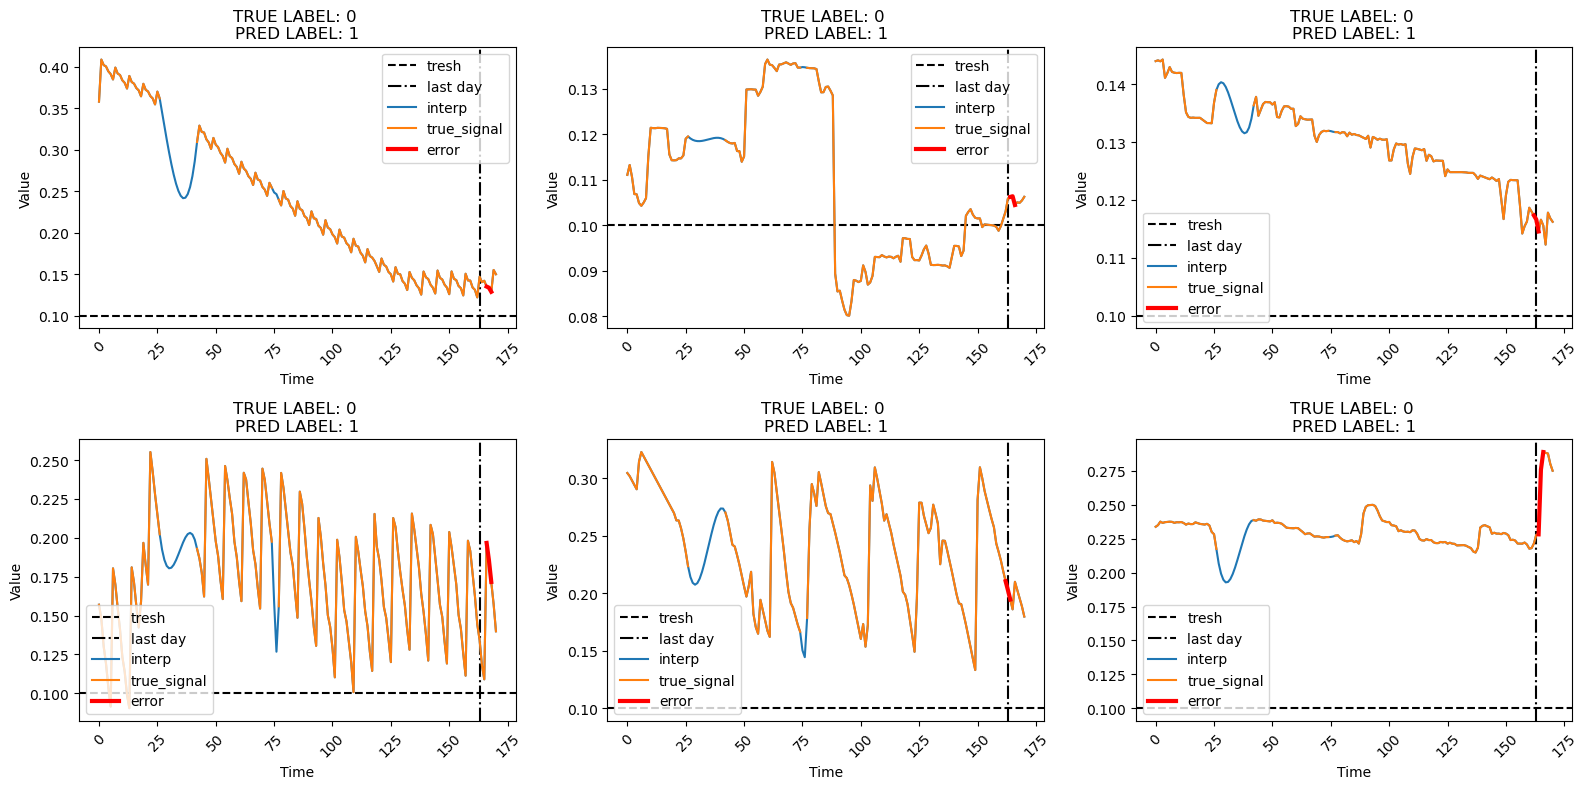

In [310]:
n_mistakes = 6
df_mistakes = (feat_ts.iloc[mistakes % len(feat_ts)]
                  .groupby('metric')
                  .apply(lambda group: group.nlargest(1, 'mean'))).reset_index(drop=True).iloc[:n_mistakes]

fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for i in range(n_mistakes):
    current = df[df['metric'] == df_mistakes.iloc[i]['metric']]
    row, col = divmod(i, 3)  # Calcola la riga e la colonna nel subplot
    ax = axes[row, col]
    
    ax.axhline(y=0.10, color='black', linestyle='--', label='tresh')
    ax.axvline(x=163, color='black', linestyle='-.', label='last day')
    ax.plot(np.arange(len(current)), current['value'].interpolate(method='cubic'), label='interp')
    ax.plot(np.arange(len(current)), current['value'], label='true_signal')
    
    err_cond = current[(current['timestamp'] >= df_mistakes['min_timestamp'].iloc[i]) & (current['timestamp'] < df_mistakes['max_timestamp'].iloc[i])]
    idxes = [i % len(current) for i in err_cond.index.values.tolist()]
    ax.plot(idxes, err_cond['value'], color='red', label='error', linewidth = 3)

    ax.set_title(f"TRUE LABEL: {df_mistakes['label'].iloc[i]} \nPRED LABEL: {pred_labels[mistakes[i]]}") # \n{df_mistakes['metric'].iloc[i]}")
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

plt.tight_layout()
plt.show()

In [311]:
feat_tr = extract_features(train, period=8)
feat_ts = extract_features(test, period=8)
feat_tr.shape, feat_ts.shape

((28320, 6), (2832, 6))

In [312]:
mc = 30
acc_scores, prec_scores, rec_scores, f1_scores = np.zeros(mc), np.zeros(mc), np.zeros(mc), np.zeros(mc)
res_24h = {
    'acc' : acc_scores,
    'prec' : prec_scores,
    'rec' : rec_scores,
    'f1' : f1_scores,
    'true_labels' : [],
    'pred_labels' : []
}


tr = feat_tr.drop(['min_timestamp', 'max_timestamp', 'metric', 'label'], axis=1)
y_tr = feat_tr['label']

for trial in tqdm(range(mc)):
    X_resampled, y_resampled = random_undersampler(tr, y_tr, target_percentage=0.5)
    
    ts = feat_ts.drop(['min_timestamp', 'max_timestamp', 'metric', 'label'], axis=1).values
    y_ts = feat_ts['label'].values
    
    clf = RandomForestClassifier()
    #clf = make_pipeline(StandardScaler(), SVC(kernel='poly',degree=3))
    
    clf.fit(X_resampled, y_resampled)
    y_pred = clf.predict(ts)
    
    res_24h['acc'][trial] = accuracy_score(y_ts, y_pred)
    res_24h['prec'][trial] = precision_score(y_ts, y_pred)
    res_24h['rec'][trial] = recall_score(y_ts, y_pred)
    res_24h['f1'][trial] = f1_score(y_ts, y_pred)
    res_24h['true_labels'].extend(y_ts)
    res_24h['pred_labels'].extend(y_pred)
    
    
print(f'ACC: {round(np.mean(res_24h["acc"]), 3)}, +/- {round(np.std(res_24h["acc"]), 3)}')
print(f'PRE: {round(np.mean(res_24h["prec"]), 3)}, +/- {round(np.std(res_24h["prec"]), 3)}')
print(f'REC: {round(np.mean(res_24h["rec"]), 3)}, +/- {round(np.std(res_24h["rec"]), 3)}')
print(f'F1: {round(np.mean(res_24h["f1"]), 3)}, +/- {round(np.std(res_24h["f1"]), 3)}')




100%|██████████| 30/30 [00:06<00:00,  4.48it/s]

ACC: 0.991, +/- 0.002
PRE: 0.632, +/- 0.059
REC: 1.0, +/- 0.0
F1: 0.773, +/- 0.045


In [313]:
confusion_matrix(res_24h['true_labels'], res_24h['pred_labels'], normalize='all')

array([[0.97629473, 0.00887476],
       [0.        , 0.01483051]])

In [314]:
tn, fp, fn, tp = confusion_matrix(res_24h['true_labels'], res_24h['pred_labels']).ravel()
(tn, fp, fn, tp)

(82946, 754, 0, 1260)

In [315]:
true_labels = np.asarray(res_24h['true_labels'])
pred_labels = np.asarray(res_24h['pred_labels'])

mistakes = np.where(true_labels != pred_labels)[0]
wrong_pred_labels = pred_labels[mistakes]

print(f'Total errors: {len(mistakes)}, Error Ratio: {round(len(mistakes)/len(true_labels)*100, 2)}%')


Total errors: 754, Error Ratio: 0.89%


In [316]:
df_mistakes_24h = (feat_ts.iloc[mistakes % len(feat_ts)]
                  .groupby('metric')
                  .apply(lambda group: group.nlargest(1, 'mean'))).reset_index(drop=True).iloc[:6]
df_mistakes_24h

,min_timestamp,max_timestamp,metric,label,mean,var
0,2023-10-05 12:00:00+00:00,2023-10-06 09:00:00+00:00,0dfea99e-4eee-4795-8b92-d2403ed873f7,0,0.105195,1.188851e-06
1,2023-10-05 12:00:00+00:00,2023-10-06 09:00:00+00:00,11680aa9-1adb-4a20-94ee-561ead3f2d52,0,0.130491,8.107970e-07
2,2023-10-05 12:00:00+00:00,2023-10-06 09:00:00+00:00,120ef41c-8bc0-43fb-9bd8-37f450dfafd5,0,0.128069,7.647470e-09
3,2023-10-05 12:00:00+00:00,2023-10-06 09:00:00+00:00,160c762a-c5e3-42b1-999c-06fbd54eb926,0,0.115948,3.209766e-06
4,2023-10-05 12:00:00+00:00,2023-10-06 09:00:00+00:00,1d4b0e3d-03d9-43ed-9585-7640e5d73aa5,0,0.130461,0.000000e+00
5,2023-10-05 12:00:00+00:00,2023-10-06 09:00:00+00:00,242f3b38-ca77-4b96-8366-4f5fd643e3d8,0,0.125656,3.693383e-07


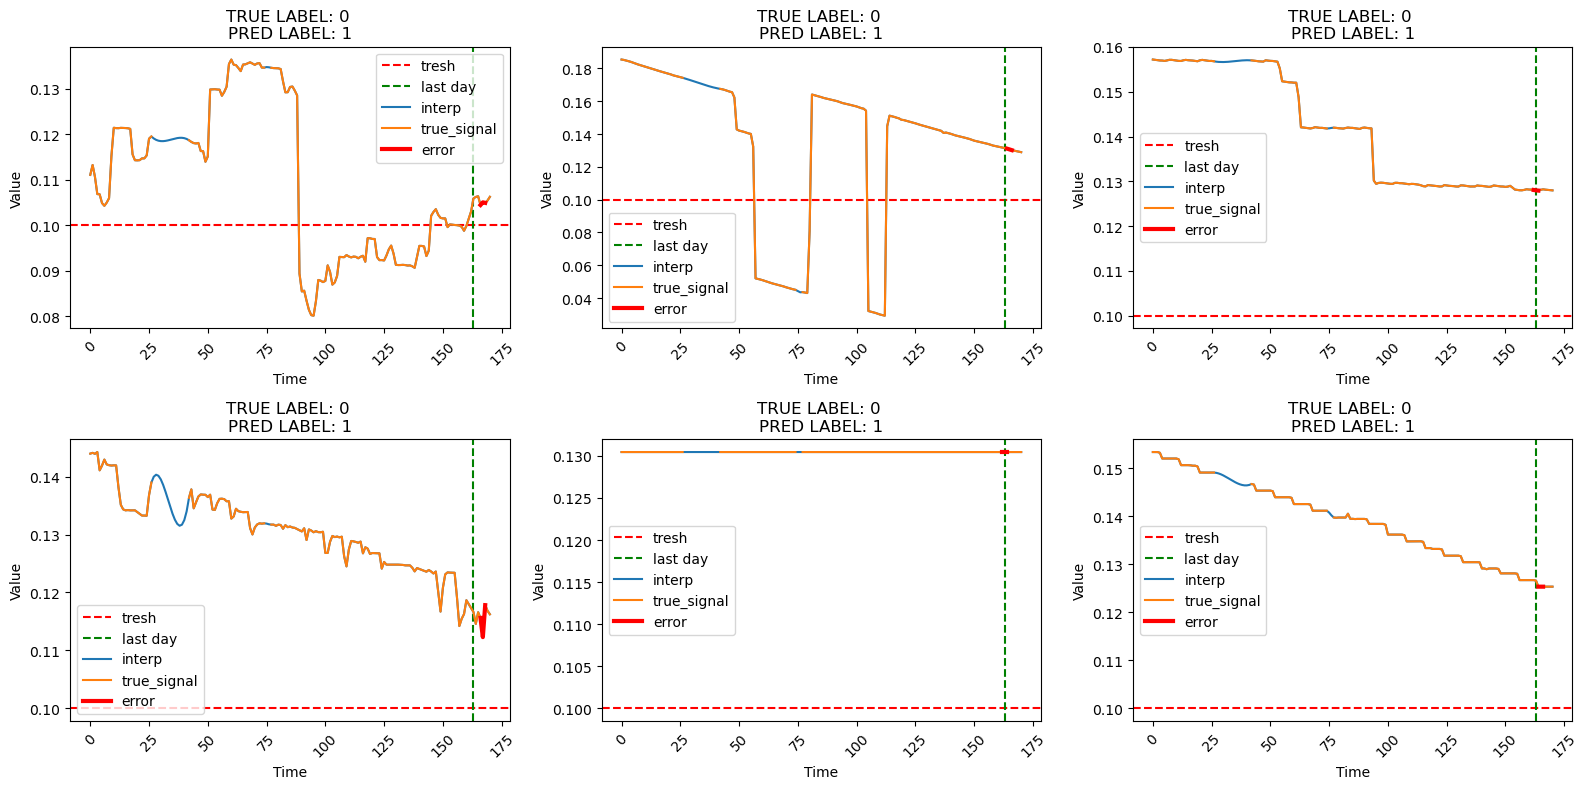

In [317]:
n_mistakes = 6
df_mistakes_24h = (feat_ts.iloc[mistakes % len(feat_ts)]
                  .groupby('metric')
                  .apply(lambda group: group.nlargest(1, 'mean'))).reset_index(drop=True).iloc[:n_mistakes]

fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for i in range(n_mistakes):
    current = df[df['metric'] == df_mistakes_24h.iloc[i]['metric']]
    row, col = divmod(i, 3)  # Calcola la riga e la colonna nel subplot
    ax = axes[row, col]
    
    ax.axhline(y=0.10, color='red', linestyle='--', label='tresh')
    ax.axvline(x=163, color='green', linestyle='--', label='last day')
    ax.plot(np.arange(len(current)), current['value'].interpolate(method='cubic'), label='interp')
    ax.plot(np.arange(len(current)), current['value'], label='true_signal')
    
    err_cond = current[(current['timestamp'] >= df_mistakes['min_timestamp'].iloc[i]) & (current['timestamp'] < df_mistakes['max_timestamp'].iloc[i])]
    idxes = [i % len(current) for i in err_cond.index.values.tolist()]
    ax.plot(idxes, err_cond['value'], color='red', label='error', linewidth = 3)
    
    ax.set_title(f"TRUE LABEL: {df_mistakes_24h['label'].iloc[i]} \nPRED LABEL: {pred_labels[mistakes[i]]}") #\n{df_mistakes_24h['metric'].iloc[i]}")
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

plt.tight_layout()
plt.show()

In [45]:
pos = pd.read_pickle('data/pos_feat_ts4.pkl')
pred = pd.read_pickle('data/pred_on_12h.pkl')['pred_labels']

In [46]:
pos

,0,1,2
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
2827,1,1,1
2828,1,1,1
2829,1,1,1
2830,1,1,1


In [50]:
len(pred) // 30

5760

In [52]:
5760 / 2832

2.0338983050847457

In [55]:
pos.dropna(axis=0, inplace=True)
pos

,0,1,2
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
2827,1,1,1
2828,1,1,1
2829,1,1,1
2830,1,1,1


In [59]:
prova = pd.DataFrame(pred) 
prova[prova.isna().any(axis=1)].index

Index([], dtype='int64')